<a href="https://colab.research.google.com/github/jctovaru-isil-pe/curso-ciencia-datos-ml-202602/blob/main/ISIL_DataSciencie_ML_Sesion02_Ejm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando las librerias de Python

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Obteniendo el Dataset (tabla) a limpiar

In [ ]:
# Dataset con mucha data y ruido
data = {
    'Producto': [
        'Laptop Pro', 'Mouse Óptico', 'Monitor 4K', 'Teclado Mecánico', 'Tablet Z',
        None, 'Impresora Láser', 'Auriculares BT', 'Cámara Web', 'Disco Duro',
        'Silla Gaming', 'Escritorio L', 'Lámpara LED', 'Cable HDMI', 'Hub USB-C',
        'Smartphone X', 'Router WiFi 6', 'Funda Tablet', 'Micrófono Condensador', None
    ],
    'Precio': [
        1200, 25, np.nan, 45, 300, 150, 200, np.nan, 80, 120,
        250, 350, np.nan, 15, 40, 800, np.nan, 20, 150, 90
    ],
    'Stock': [
        '10', '50', '15', '20', '8', '5', '12', '30', '25', '18',
        '7', '5', '40', '100', '60', '15', '10', '45', '12', '3'
    ],
    'Categoria': [
        'Computación', 'Accesorios', 'Computación', None, 'Móviles',
        'Accesorios', 'Oficina', 'Audio', 'Video', 'Almacenamiento',
        'Muebles', 'Muebles', 'Iluminación', 'Accesorios', 'Accesorios',
        'Móviles', 'Redes', 'Móviles', 'Audio', 'Video'
    ]
}

#Imprimir el JSON
print(data)

#Convertir el JSON a un DataFrame (pandas)
df = pd.DataFrame(data)
print(df)

{'Producto': ['Laptop Pro', 'Mouse Óptico', 'Monitor 4K', 'Teclado Mecánico', 'Tablet Z', None, 'Impresora Láser', 'Auriculares BT', 'Cámara Web', 'Disco Duro', 'Silla Gaming', 'Escritorio L', 'Lámpara LED', 'Cable HDMI', 'Hub USB-C', 'Smartphone X', 'Router WiFi 6', 'Funda Tablet', 'Micrófono Condensador', None], 'Precio': [1200, 25, nan, 45, 300, 150, 200, nan, 80, 120, 250, 350, nan, 15, 40, 800, nan, 20, 150, 90], 'Stock': ['10', '50', '15', '20', '8', '5', '12', '30', '25', '18', '7', '5', '40', '100', '60', '15', '10', '45', '12', '3'], 'Categoria': ['Computación', 'Accesorios', 'Computación', None, 'Móviles', 'Accesorios', 'Oficina', 'Audio', 'Video', 'Almacenamiento', 'Muebles', 'Muebles', 'Iluminación', 'Accesorios', 'Accesorios', 'Móviles', 'Redes', 'Móviles', 'Audio', 'Video']}
                 Producto  Precio Stock       Categoria
0              Laptop Pro  1200.0    10     Computación
1            Mouse Óptico    25.0    50      Accesorios
2              Monitor 4K     Na

# 3. Visualizar el dataset (Antes de la limpieza)

Text(0.5, 1.0, 'Antes: Mapa de Calor de Nulos\nLineas amarillas = Datos faltantes')

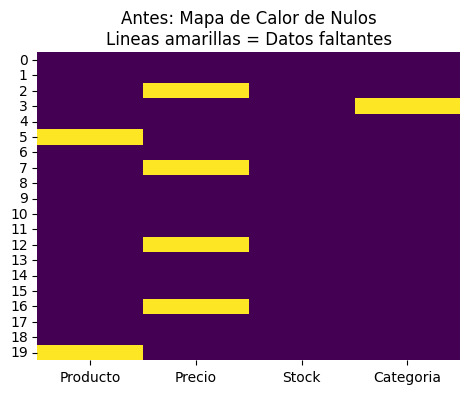

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Antes: Mapa de Calor de Nulos\nLineas amarillas = Datos faltantes")

# 4. Proceso de limpieza

In [ ]:
# Limpiando los datos innecesarios, en este caso porque no esta defnido el Producto
# en este caso se han eliminado los dos registros
df_limpio = df.dropna(subset=['Producto']).copy()
print(df_limpio)

                 Producto  Precio Stock       Categoria
0              Laptop Pro  1200.0    10     Computación
1            Mouse Óptico    25.0    50      Accesorios
2              Monitor 4K     NaN    15     Computación
3        Teclado Mecánico    45.0    20            None
4                Tablet Z   300.0     8         Móviles
6         Impresora Láser   200.0    12         Oficina
7          Auriculares BT     NaN    30           Audio
8              Cámara Web    80.0    25           Video
9              Disco Duro   120.0    18  Almacenamiento
10           Silla Gaming   250.0     7         Muebles
11           Escritorio L   350.0     5         Muebles
12            Lámpara LED     NaN    40     Iluminación
13             Cable HDMI    15.0   100      Accesorios
14              Hub USB-C    40.0    60      Accesorios
15           Smartphone X   800.0    15         Móviles
16          Router WiFi 6     NaN    10           Redes
17           Funda Tablet    20.0    45         

In [ ]:
# Completar los "huecos" de algunas variables que estan nulas
# para el caso de Precio y Categoria
media_precio = df_limpio['Precio'].mean()
mediana_precio = df_limpio['Precio'].median()
df_limpio['Precio'] = df_limpio['Precio'].fillna(media_precio)
df_limpio['Categoria'] = df_limpio['Categoria'].fillna('Sin Categoria')
print(df_limpio)


                 Producto       Precio Stock       Categoria
0              Laptop Pro  1200.000000    10     Computación
1            Mouse Óptico    25.000000    50      Accesorios
2              Monitor 4K   256.785714    15     Computación
3        Teclado Mecánico    45.000000    20   Sin Categoria
4                Tablet Z   300.000000     8         Móviles
6         Impresora Láser   200.000000    12         Oficina
7          Auriculares BT   256.785714    30           Audio
8              Cámara Web    80.000000    25           Video
9              Disco Duro   120.000000    18  Almacenamiento
10           Silla Gaming   250.000000     7         Muebles
11           Escritorio L   350.000000     5         Muebles
12            Lámpara LED   256.785714    40     Iluminación
13             Cable HDMI    15.000000   100      Accesorios
14              Hub USB-C    40.000000    60      Accesorios
15           Smartphone X   800.000000    15         Móviles
16          Router WiFi 

In [ ]:
print(df_limpio.info)
print(df_limpio.describe)

<bound method DataFrame.info of                  Producto       Precio Stock       Categoria
0              Laptop Pro  1200.000000    10     Computación
1            Mouse Óptico    25.000000    50      Accesorios
2              Monitor 4K   256.785714    15     Computación
3        Teclado Mecánico    45.000000    20   Sin Categoria
4                Tablet Z   300.000000     8         Móviles
6         Impresora Láser   200.000000    12         Oficina
7          Auriculares BT   256.785714    30           Audio
8              Cámara Web    80.000000    25           Video
9              Disco Duro   120.000000    18  Almacenamiento
10           Silla Gaming   250.000000     7         Muebles
11           Escritorio L   350.000000     5         Muebles
12            Lámpara LED   256.785714    40     Iluminación
13             Cable HDMI    15.000000   100      Accesorios
14              Hub USB-C    40.000000    60      Accesorios
15           Smartphone X   800.000000    15         

In [ ]:
# La variable Stock si bien tiene datos numericos, hay que marcarlo asi para asegurarse de que asi sea
df_limpio['Stock'] = df_limpio['Stock'].astype(int)

In [ ]:
print(df_limpio)

                 Producto       Precio  Stock       Categoria
0              Laptop Pro  1200.000000     10     Computación
1            Mouse Óptico    25.000000     50      Accesorios
2              Monitor 4K   256.785714     15     Computación
3        Teclado Mecánico    45.000000     20   Sin Categoria
4                Tablet Z   300.000000      8         Móviles
6         Impresora Láser   200.000000     12         Oficina
7          Auriculares BT   256.785714     30           Audio
8              Cámara Web    80.000000     25           Video
9              Disco Duro   120.000000     18  Almacenamiento
10           Silla Gaming   250.000000      7         Muebles
11           Escritorio L   350.000000      5         Muebles
12            Lámpara LED   256.785714     40     Iluminación
13             Cable HDMI    15.000000    100      Accesorios
14              Hub USB-C    40.000000     60      Accesorios
15           Smartphone X   800.000000     15         Móviles
16      

# 5. Visualizar el dataset (Despues de la limpieza)

Text(0.5, 1.0, 'Antes: Mapa de Calor de Nulos\nLineas amarillas = Datos faltantes')

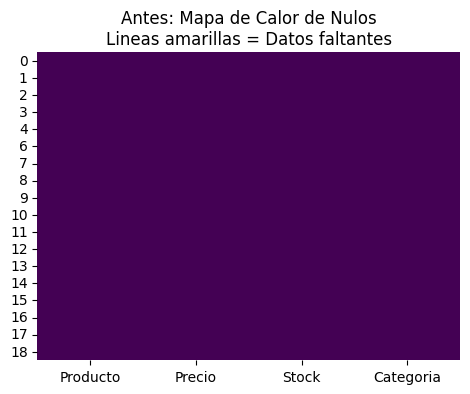

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(df_limpio.isnull(), cbar=False, cmap="viridis")
plt.title("Antes: Mapa de Calor de Nulos\nLineas amarillas = Datos faltantes")

# 6. Codificación de Variables Categóricas

In [ ]:
# Codificacion de las variables categoricas

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_limpio['Codigo_Categoria'] = le.fit_transform(df_limpio['Categoria'])

print(df_limpio)

                 Producto       Precio  Stock       Categoria  \
0              Laptop Pro  1200.000000     10     Computación   
1            Mouse Óptico    25.000000     50      Accesorios   
2              Monitor 4K   256.785714     15     Computación   
3        Teclado Mecánico    45.000000     20   Sin Categoria   
4                Tablet Z   300.000000      8         Móviles   
6         Impresora Láser   200.000000     12         Oficina   
7          Auriculares BT   256.785714     30           Audio   
8              Cámara Web    80.000000     25           Video   
9              Disco Duro   120.000000     18  Almacenamiento   
10           Silla Gaming   250.000000      7         Muebles   
11           Escritorio L   350.000000      5         Muebles   
12            Lámpara LED   256.785714     40     Iluminación   
13             Cable HDMI    15.000000    100      Accesorios   
14              Hub USB-C    40.000000     60      Accesorios   
15           Smartphone X

# 7. Normalizacion de datos numericos

In [ ]:
# Normalizacion de datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_limpio[['Precio_Normalizado', 'Stock_Normalizado']] = scaler.fit_transform(df_limpio[['Precio', 'Stock']])

print(df_limpio)

                 Producto       Precio  Stock       Categoria  \
0              Laptop Pro  1200.000000     10     Computación   
1            Mouse Óptico    25.000000     50      Accesorios   
2              Monitor 4K   256.785714     15     Computación   
3        Teclado Mecánico    45.000000     20   Sin Categoria   
4                Tablet Z   300.000000      8         Móviles   
6         Impresora Láser   200.000000     12         Oficina   
7          Auriculares BT   256.785714     30           Audio   
8              Cámara Web    80.000000     25           Video   
9              Disco Duro   120.000000     18  Almacenamiento   
10           Silla Gaming   250.000000      7         Muebles   
11           Escritorio L   350.000000      5         Muebles   
12            Lámpara LED   256.785714     40     Iluminación   
13             Cable HDMI    15.000000    100      Accesorios   
14              Hub USB-C    40.000000     60      Accesorios   
15           Smartphone X

# 8. Division de Datos (Train/Test)

In [ ]:
# Importar el train_test_split
from sklearn.model_selection import train_test_split

# Definimos las caracteristicas (X), son el stock y la categoria
X = df_limpio[['Stock_Normalizado', 'Codigo_Categoria']]

# Definir la variable a predecir (Y) que es el Precio
y = df_limpio['Precio_Normalizado']

print(X)
print(y)

# Entrenamiento y prueba de mis datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_test)
print(y_test)

    Stock_Normalizado  Codigo_Categoria
0           -0.706781                 3
1            0.978260                 0
2           -0.496151                 3
3           -0.285521                 9
4           -0.791033                 6
6           -0.622529                 7
7            0.135739                 2
8           -0.074891                10
9           -0.369773                 1
10          -0.833160                 5
11          -0.917412                 5
12           0.557000                 4
13           3.084562                 0
14           1.399521                 0
15          -0.496151                 6
16          -0.706781                 8
17           0.767630                 6
18          -0.622529                 2
0     3.245791
1    -0.797621
2     0.000000
3    -0.728797
4     0.148709
6    -0.195411
7     0.000000
8    -0.608355
9    -0.470707
10   -0.023351
11    0.320769
12    0.000000
13   -0.832033
14   -0.746003
15    1.869310
16    0.000000


# 9. Visualizacion de Datos

Text(0.5, 1.0, 'Correlacion de las variables procesadas')

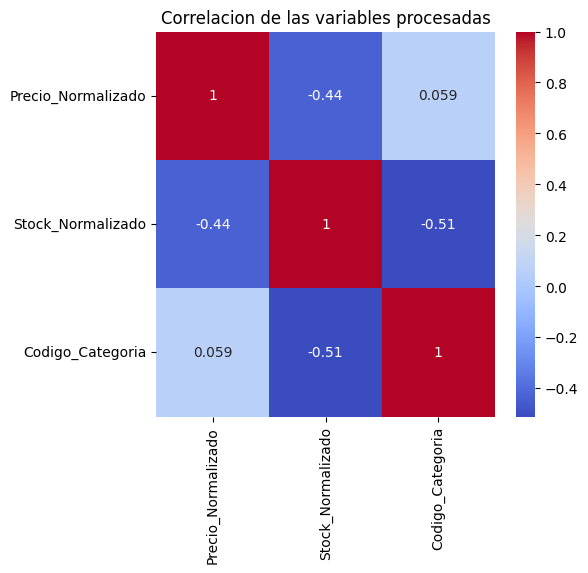

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.heatmap(df_limpio[['Precio_Normalizado', 'Stock_Normalizado', 'Codigo_Categoria']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlacion de las variables procesadas")

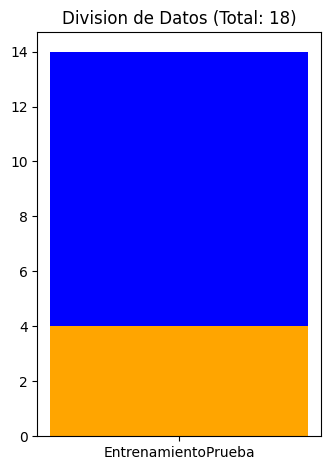

In [ ]:
plt.subplot(1, 2, 1)
plt.bar(['Entrenamiento' 'Prueba'], [len(X_train), len(X_test)], color=['blue', 'orange'])
plt.title(f'Division de Datos (Total: {len(df_limpio)})')
plt.tight_layout()
plt.show()